# **💼 Attrition in an Organization || Why Workers Quit?**

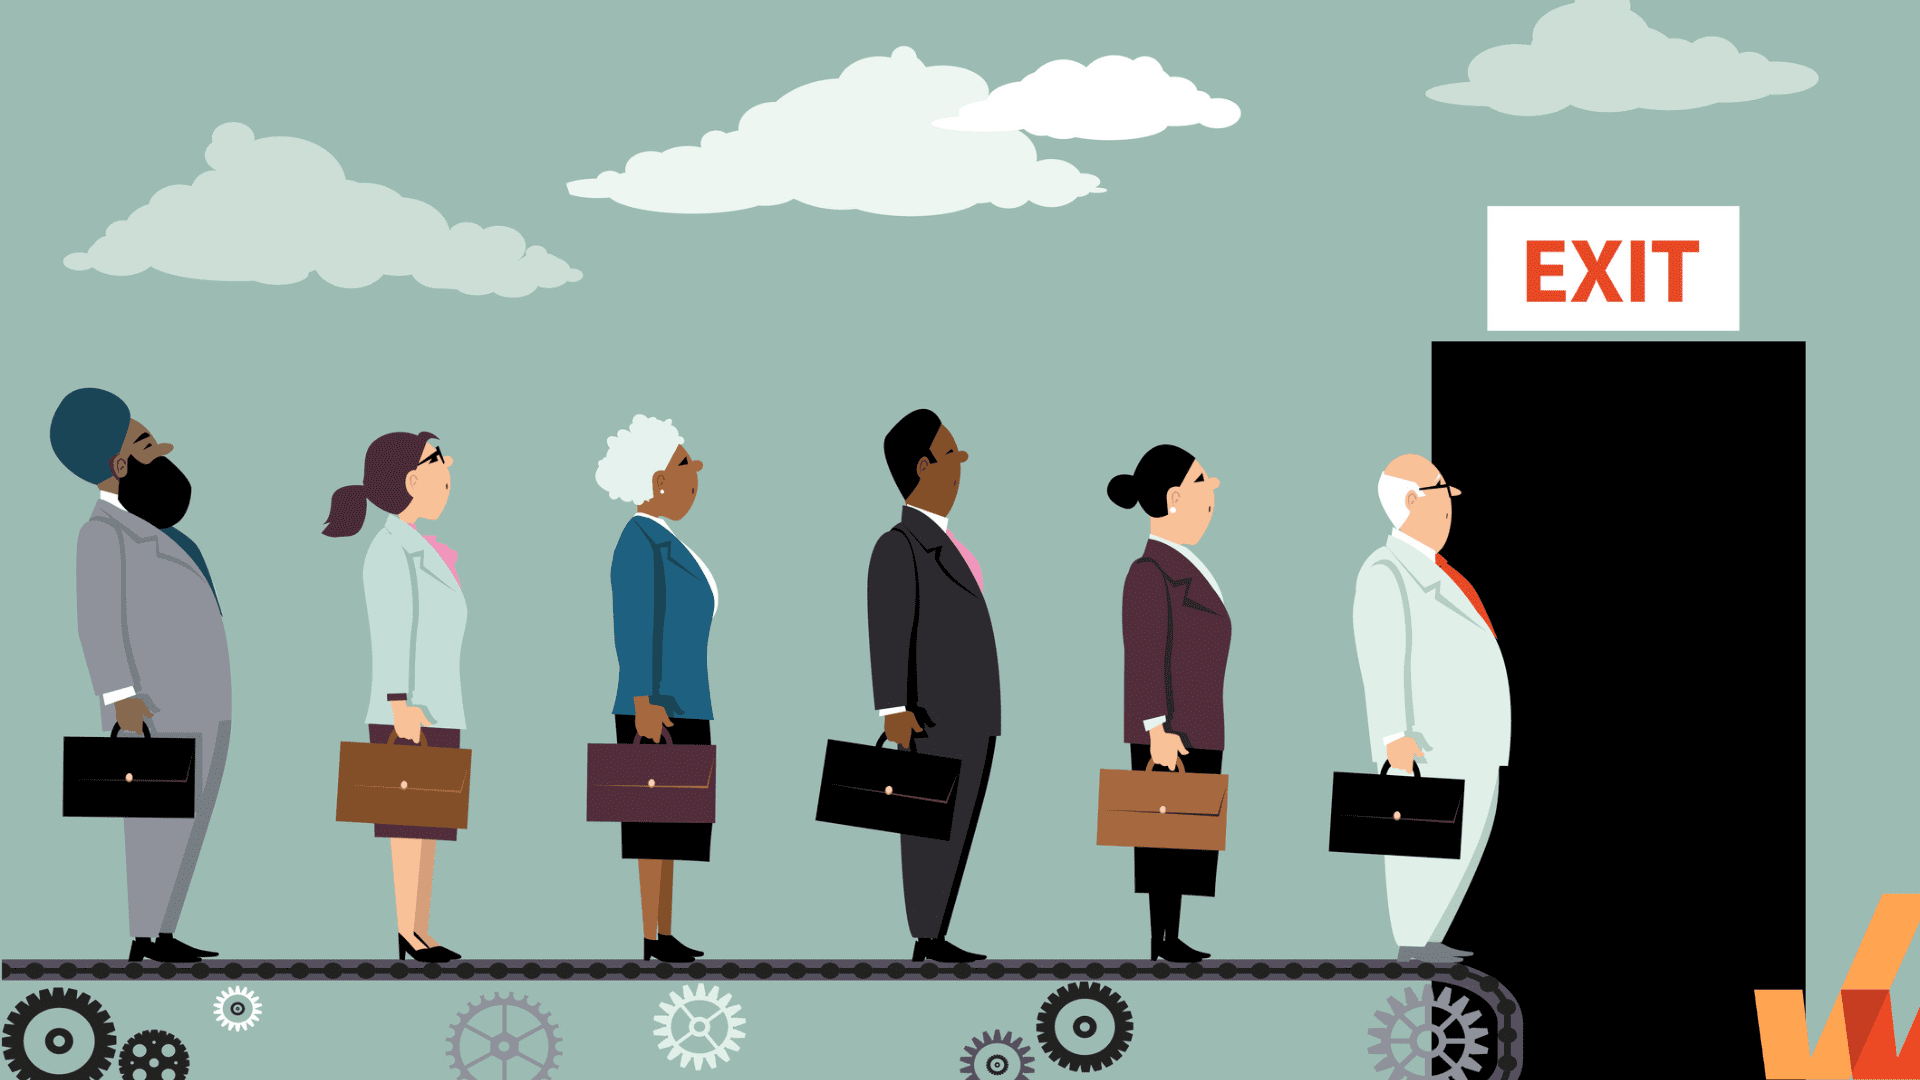

Employees are the backbone of the organization. Organization's performance is heavily based on the quality of the employees. Challenges that an organization has to face due employee attrition are:



*   Expensive in terms of both money and time to train new employees.


*   Loss of experienced employees

*   Impact in productivity



*   Impact profit




Dataset used : https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset



*   Education [1 'Below College' 2 'College' 3 'Bachelor' 4 'Master' 5 'Doctor']

*   EnvironmentSatisfaction [1 'Low' 2 'Medium' 3 'High' 4 'Very High']

*   JobInvolvement [1 'Low' 2 'Medium' 3 'High' 4 'Very High']

*   JobSatisfaction [1 'Low' 2 'Medium' 3 'High' 4 'Very High']
*   PerformanceRating [1 'Low' 2 'Good' 3 'Excellent' 4 'Outstanding']




*   RelationshipSatisfaction [1 'Low' 2 'Medium' 3 'High' 4 'Very High']


*   WorkLifeBalance [1 'Bad' 2 'Good' 3 'Better' 4 'Best']






# **Importing File**

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data =pd.read_csv('/content/WA_Fn-UseC_-HR-Employee-Attrition.csv')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1.0,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8.0,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2.0,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3.0,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2.0,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
data1=data.copy()    # keeping a copy of dataset

In [4]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   int64  
 1   Attrition                 1470 non-null   object 
 2   BusinessTravel            1460 non-null   object 
 3   DailyRate                 1470 non-null   int64  
 4   Department                1465 non-null   object 
 5   DistanceFromHome          1466 non-null   float64
 6   Education                 1470 non-null   int64  
 7   EducationField            1467 non-null   object 
 8   EmployeeCount             1470 non-null   int64  
 9   EmployeeNumber            1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

In [6]:
data.shape


(1470, 35)

In [7]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1466.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.200546,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.110796,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [8]:
# Identify the data types of columns
column_data_types = data.dtypes

# Count the numerical and categorical columns
numerical_count = 0
categorical_count = 0

for column_name, data_type in column_data_types.items():
    if np.issubdtype(data_type, np.number):
        numerical_count += 1
    else:
        categorical_count += 1

# Print the counts
print(f"There are {numerical_count} Numerical Columns in dataset")
print(f"There are {categorical_count} Categorical Columns in dataset")

There are 26 Numerical Columns in dataset
There are 9 Categorical Columns in dataset


In [9]:
data.select_dtypes(np.number).sample(5)

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
17,22,1123,16.0,2,1,22,4,96,4,1,...,2,80,2,1,2,2,1,0,0,0
1094,40,1342,9.0,2,1,1548,1,47,3,2,...,4,80,0,9,5,4,8,4,7,1
642,38,395,9.0,3,1,893,2,98,2,1,...,4,80,1,3,3,3,2,2,1,2
122,56,441,14.0,4,1,161,2,72,3,1,...,1,80,3,7,2,3,5,4,4,3
948,30,634,17.0,4,1,1321,2,95,3,3,...,4,80,2,9,2,3,9,1,0,8


In [10]:
data.select_dtypes(include='O').sample(5)


,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
818,No,Travel_Frequently,Sales,Life Sciences,Male,Sales Representative,Married,Y,No
580,No,Travel_Rarely,Sales,Life Sciences,Female,Sales Representative,Married,Y,No
1374,No,Travel_Rarely,Sales,Life Sciences,Female,Manager,Married,Y,Yes
1426,No,Travel_Rarely,Research & Development,Life Sciences,Female,Laboratory Technician,Single,Y,No
448,No,Travel_Rarely,Research & Development,Life Sciences,Female,Manufacturing Director,Single,Y,No


In [11]:
# Descriptive Analysis of numerical data
round(data.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.92,9.14,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.49,403.51,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1466.0,9.20,8.11,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.91,1.02,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.00,0.00,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.87,602.02,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.72,1.09,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.89,20.33,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.73,0.71,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.06,1.11,1.0,1.00,2.0,3.00,5.0




*  minimum age is 18 that means all are adults, so no need for Over 18 col.


*   standard deviation in employee count and standard deviation in Standard Hours are same so values are same in that col.
*   Employee number is unique for everyone it will not give any meaningful insights



   



In [12]:
d_col =["Over18", "EmployeeCount", "EmployeeNumber", "StandardHours"]
data.drop(columns=d_col, inplace=True,axis=1)

In [13]:
# Descriptive anlysis on categorical
data.describe(include="O").T

,count,unique,top,freq
Attrition,1470,2,No,1233
BusinessTravel,1460,3,Travel_Rarely,1033
Department,1465,3,Research & Development,956
EducationField,1467,6,Life Sciences,604
Gender,1470,2,Male,882
JobRole,1470,9,Sales Executive,326
MaritalStatus,1470,3,Married,673
OverTime,1470,2,No,1054




*   Attrition and overtime cols are biased towards No.

*  Business Travel is biased towards Travel_rarely.


* Performance rating is highly biased towards excellent.






In [14]:
cat_cols = data.select_dtypes(include="O").columns

for column in cat_cols:
    print('Unique values of ', column, set(data[column]))
    print("--------------------------------------------")

Unique values of  Attrition {'Yes', 'No'}
--------------------------------------------
Unique values of  BusinessTravel {'Non-Travel', 'Travel_Rarely', 'Travel_Frequently', nan}
--------------------------------------------
Unique values of  Department {'Research & Development', 'Human Resources', 'Sales', nan}
--------------------------------------------
Unique values of  EducationField {'Other', 'Technical Degree', 'Marketing', 'Life Sciences', 'Human Resources', 'Medical', nan}
--------------------------------------------
Unique values of  Gender {'Male', 'Female'}
--------------------------------------------
Unique values of  JobRole {'Manager', 'Research Director', 'Healthcare Representative', 'Human Resources', 'Research Scientist', 'Sales Representative', 'Laboratory Technician', 'Manufacturing Director', 'Sales Executive'}
--------------------------------------------
Unique values of  MaritalStatus {'Married', 'Single', 'Divorced'}
--------------------------------------------
Un

# **EDA**

<ipython-input-15-097e724fd49e>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attrition_counts.index, y=attrition_counts.values, palette='viridis', ax=ax[0])


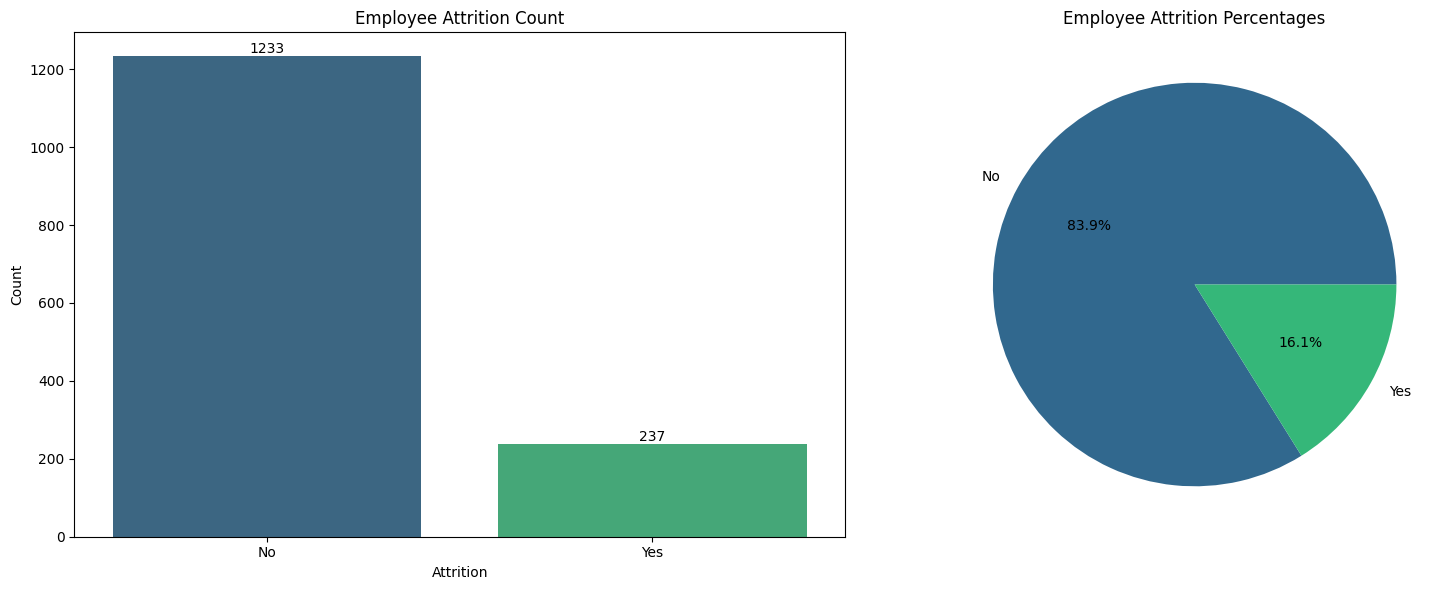

In [15]:
# Count the occurrences of each attrition status
attrition_counts = data['Attrition'].value_counts()

# Calculate the percentage of each attrition status
attrition_percentages = attrition_counts / attrition_counts.sum() * 100

# Create a figure with two subplots arranged horizontally
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Plot the bar graph for counts
sns.barplot(x=attrition_counts.index, y=attrition_counts.values, palette='viridis', ax=ax[0])
ax[0].set_title('Employee Attrition Count')
ax[0].set_xlabel('Attrition')
ax[0].set_ylabel('Count')

# Add count labels on top of the bars
for index, value in enumerate(attrition_counts.values):
    ax[0].text(index, value, str(value), ha='center', va='bottom')

# Plot the pie chart for percentages
ax[1].pie(attrition_percentages, labels=attrition_percentages.index, autopct='%1.1f%%', colors=sns.color_palette('viridis', len(attrition_percentages)))
ax[1].set_title('Employee Attrition Percentages')

# Adjust the layout to avoid overlapping
plt.tight_layout()

# Display the plots
plt.show();


* Majority of employees didn't leave the organization.




In [16]:
def pie_bar_plot(data, col, hue):
   plt.figure(figsize=(14, 6))

   # Extract value counts for the specified column
   value_counts = data[col].value_counts().sort_index()

    # First subplot: Pie chart
   plt.subplot(1, 2, 1)
   ax1 = value_counts
   plt.title(f"Distribution by {col}", fontweight="black", size=14, pad=15)
   colors = sns.color_palette('Paired', len(ax1))
   plt.pie(ax1.values, labels=ax1.index, autopct="%.1f%%", pctdistance=0.75, startangle=90,
            colors=colors, textprops={"size":14})
   center_circle = plt.Circle((0, 0), 0.4, fc='white')
   fig = plt.gcf()
   fig.gca().add_artist(center_circle)
    # Second subplot: Bar plot
   plt.subplot(1, 2, 2)
   new_df = data[data[hue] == 'Yes']
   value_1 = value_counts
   value_2 = new_df[col].value_counts().sort_index()  # Sort the values in the same order
   ax2 = np.floor((value_2 / value_1) * 100).values
   sns.barplot(x=value_2.index, y=value_2.values, palette='Paired')
   plt.title(f"Attrition Rate by {col}", fontweight="black", size=14, pad=15)
   for index, value in enumerate(value_2):
        plt.text(index, value, str(value) + " (" + str(int(ax2[index])) + "% )", ha="center", va="bottom", size=10)

   plt.tight_layout()
   plt.show()

# **Attrition by Gender**

<ipython-input-16-61795e1516f9>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_2.index, y=value_2.values, palette='Paired')


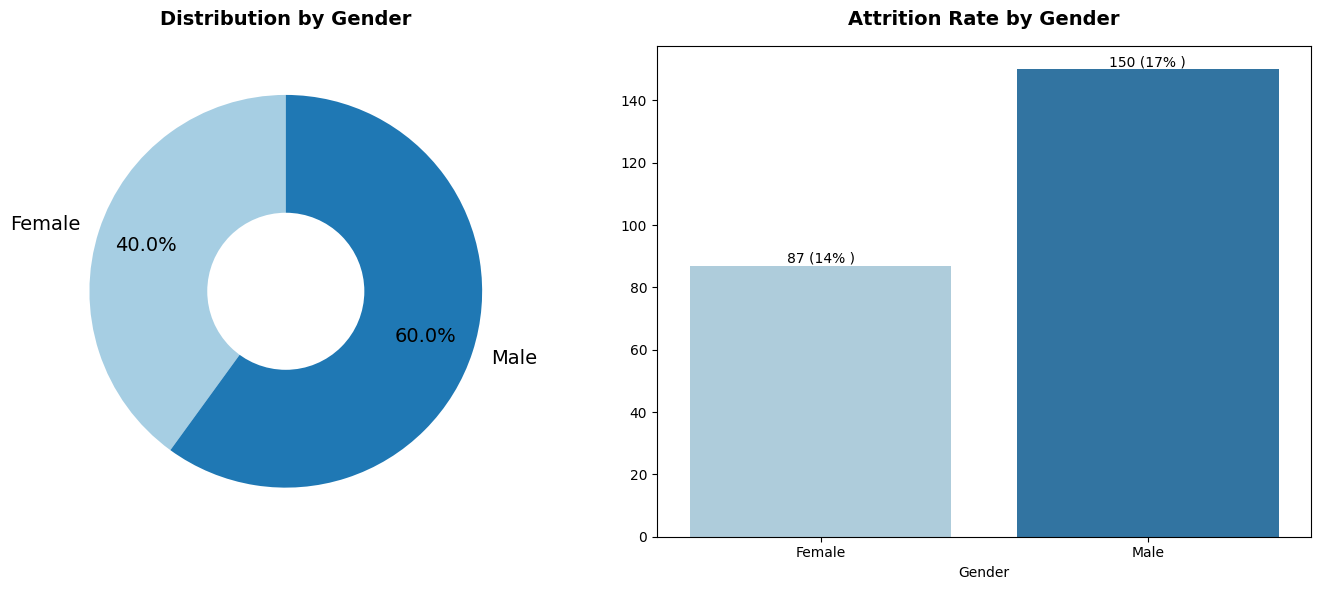

In [17]:
pie_bar_plot(data, 'Gender', 'Attrition')




*   Male employees are higher in propotion than female with more than 20%
*   Atrition in male is higher compared to females




# **Attrition by Marital status**

<ipython-input-16-61795e1516f9>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_2.index, y=value_2.values, palette='Paired')


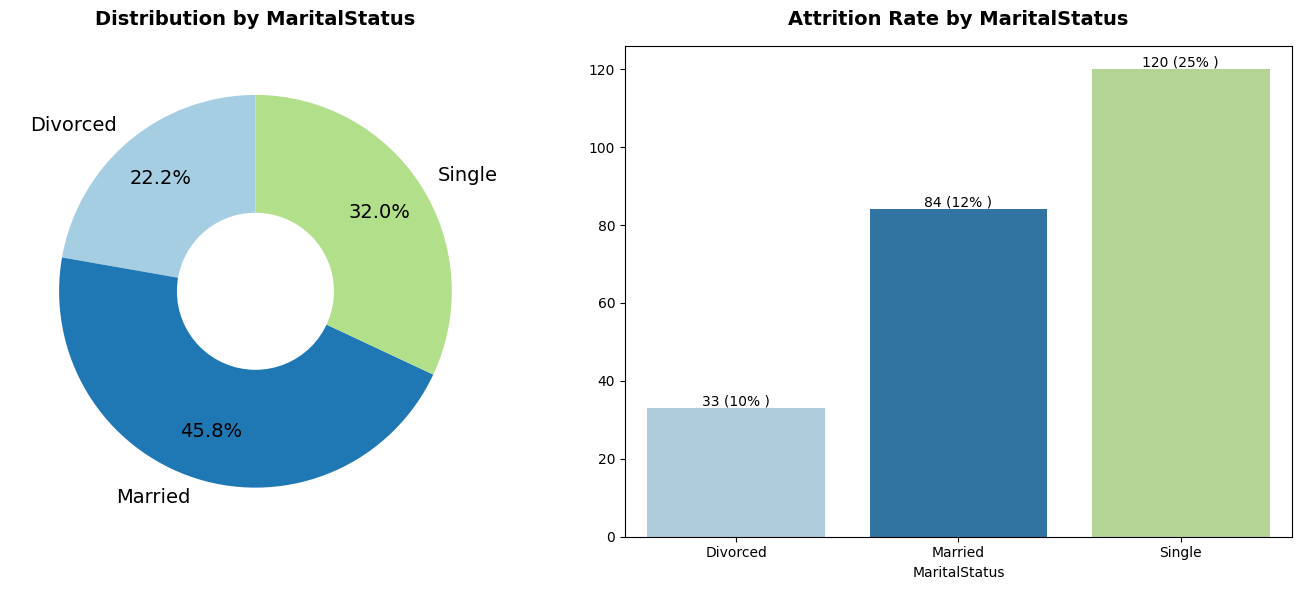

In [18]:
pie_bar_plot(data, 'MaritalStatus', 'Attrition')




*   Most of the employees are Married in the organization.


*  The attrition rate is very high of employees who are divorced.
*   The attrition rate is low for employees who are single.







# **Attrition by Business Travel**

<ipython-input-16-61795e1516f9>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_2.index, y=value_2.values, palette='Paired')


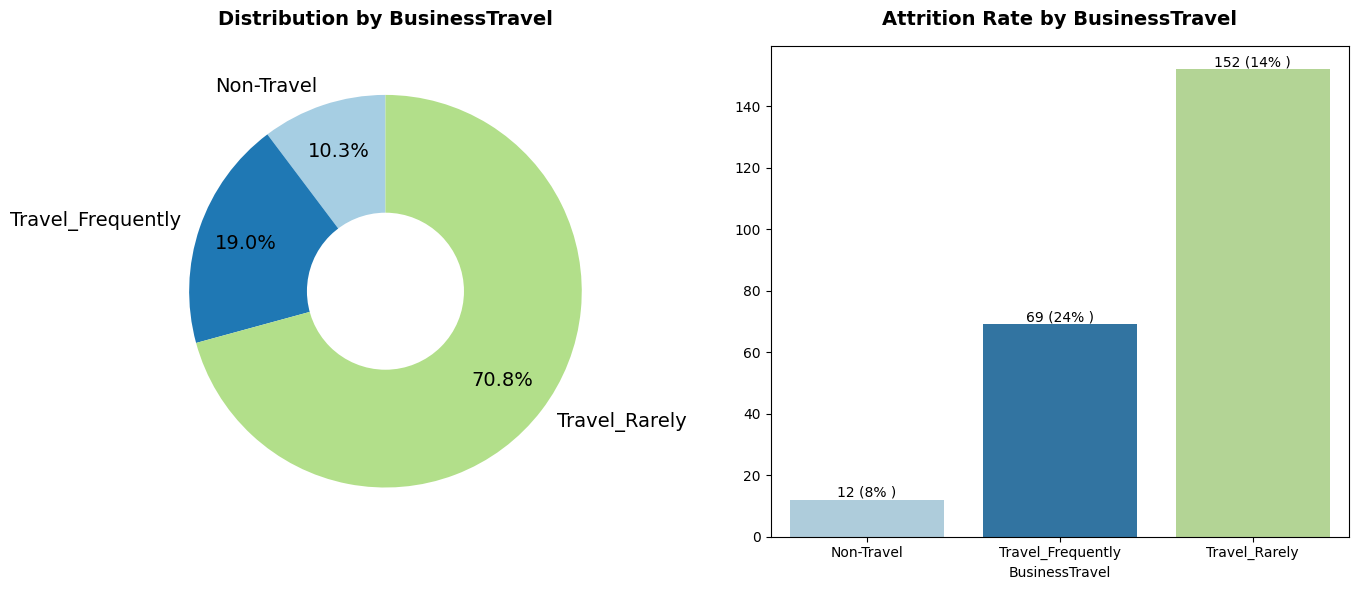

In [19]:
pie_bar_plot(data, 'BusinessTravel', 'Attrition')



*   Most of the employees in the organization Travel Rarely.


*   Highest employee attrition can be observed by those employees who Travels Frequently

*   Lowest employee attrition can be observed by those employees who are Non-Travel.




# **Attrition by Department**

<ipython-input-16-61795e1516f9>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_2.index, y=value_2.values, palette='Paired')


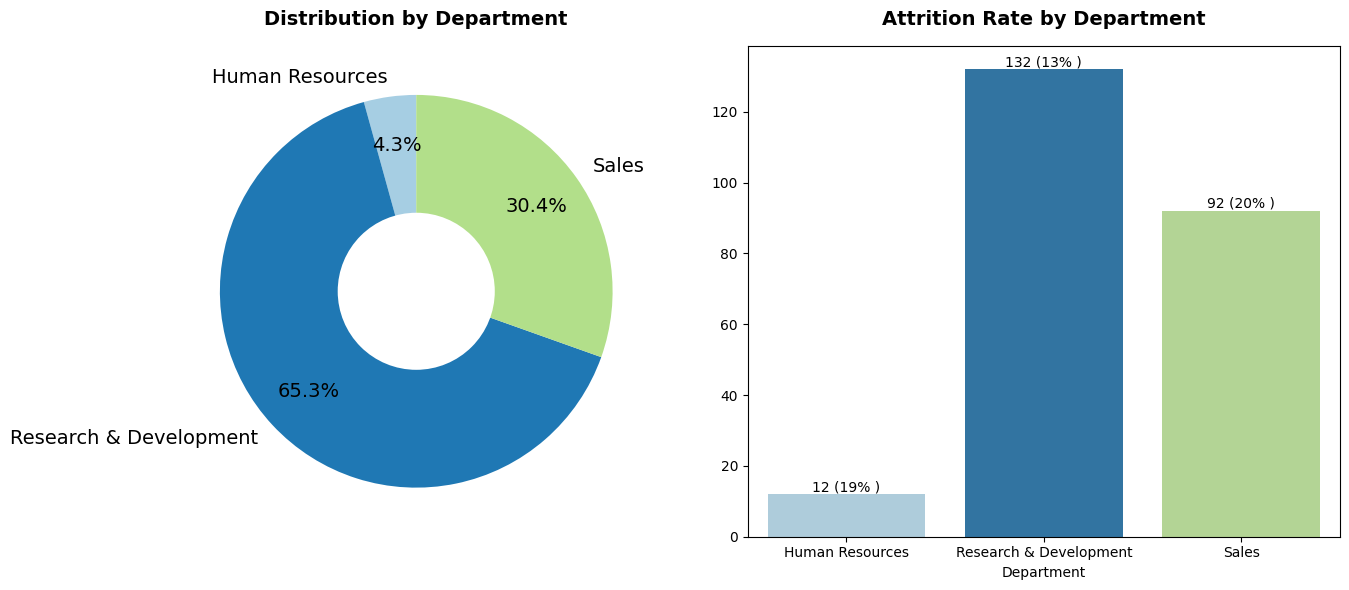

In [20]:
pie_bar_plot(data, 'Department', 'Attrition')


Most of the employees are from Research & Development Department (65.3%).

Highest Attrition is in the Sales Department.

Human Resources Department Attrition rate is also very high.

Attrition in Research & Development Department is least compared to other departments.

# **Attrition by Education**

<ipython-input-16-61795e1516f9>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_2.index, y=value_2.values, palette='Paired')


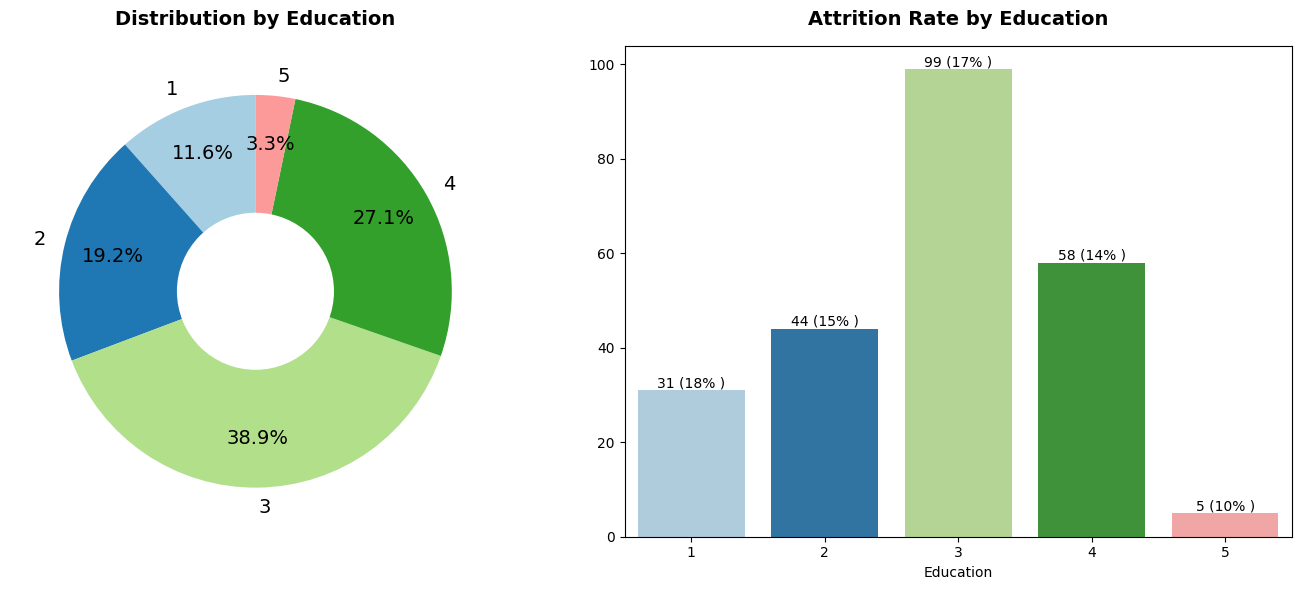

In [21]:
pie_bar_plot(data, 'Education', 'Attrition')


Most of the employees in the organization have completed Bachelors or Masters degree.
Very few employees in the organization have completed Doctorate degree.
Employee those who have not completed college (Below College level) has highest Attrition rate followed by Bachelor degree holder.

In [22]:
import matplotlib.ticker as ticker
def hist_with_hue(data, col, hue):
    plt.figure(figsize=(13.5, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(x=col, hue=hue, data=data, kde=True, palette='hls')

    # Configure the x-axis to display integer values and center-align the labels
    ax = plt.gca()
    ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
    plt.xticks(rotation=90, position=(0.5, 0), ha = 'center')  # Rotate x-axis labels by 90 degrees and center-align

    plt.title(f"Distribution by {col}", fontweight="black", size=14, pad=10)

    plt.subplot(1, 2, 2)
    sns.boxplot(x=hue, y=col, data=data, palette='hls')
    plt.title(f"Distribution by {col} & {hue}", fontweight="black", size=14, pad=10)
    plt.tight_layout()
    plt.show()

# **Attrition by Age**

<ipython-input-22-cc96671636ff>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=hue, y=col, data=data, palette='hls')


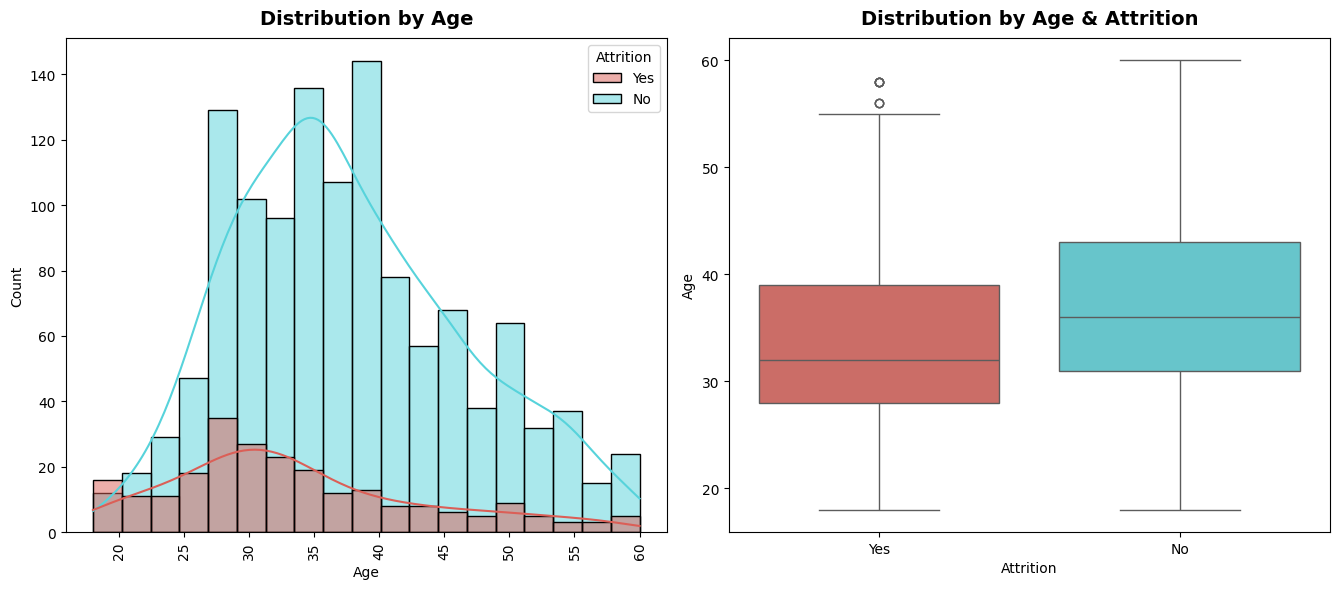

In [23]:
hist_with_hue(data, 'Age', 'Attrition')


Most of the emloyees are between age 30 to 40.
Age increases attrition gradually decreases
Employees with young age leaves the company more compared to elder employees.

# **Attrition by Worklife balance**

<ipython-input-16-61795e1516f9>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_2.index, y=value_2.values, palette='Paired')


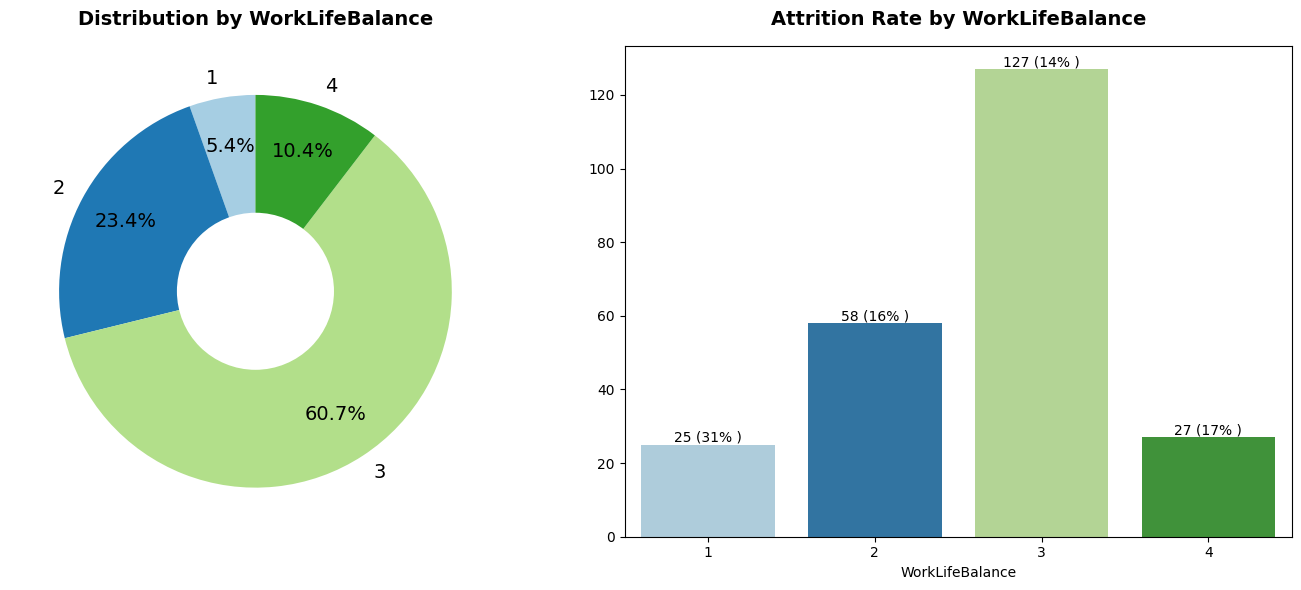

In [24]:
pie_bar_plot(data, 'WorkLifeBalance', 'Attrition')

More than 60% of employees are having a better work life balance.
Employees with Bad Work Life Balance is having very high Attrition Rate.

# **Attrition by Performance rating**

<ipython-input-16-61795e1516f9>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_2.index, y=value_2.values, palette='Paired')


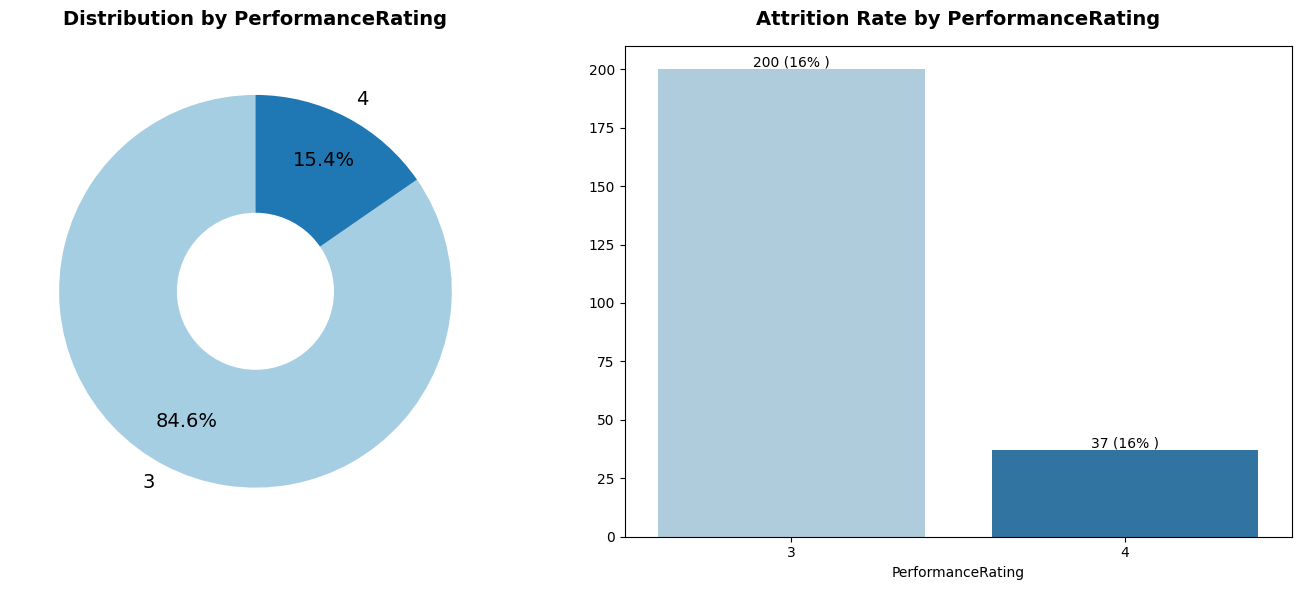

In [25]:
pie_bar_plot(data, 'PerformanceRating', 'Attrition')


Majority of employees have excellent performance rating

# **Attrition by Over Time**


<ipython-input-16-61795e1516f9>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_2.index, y=value_2.values, palette='Paired')


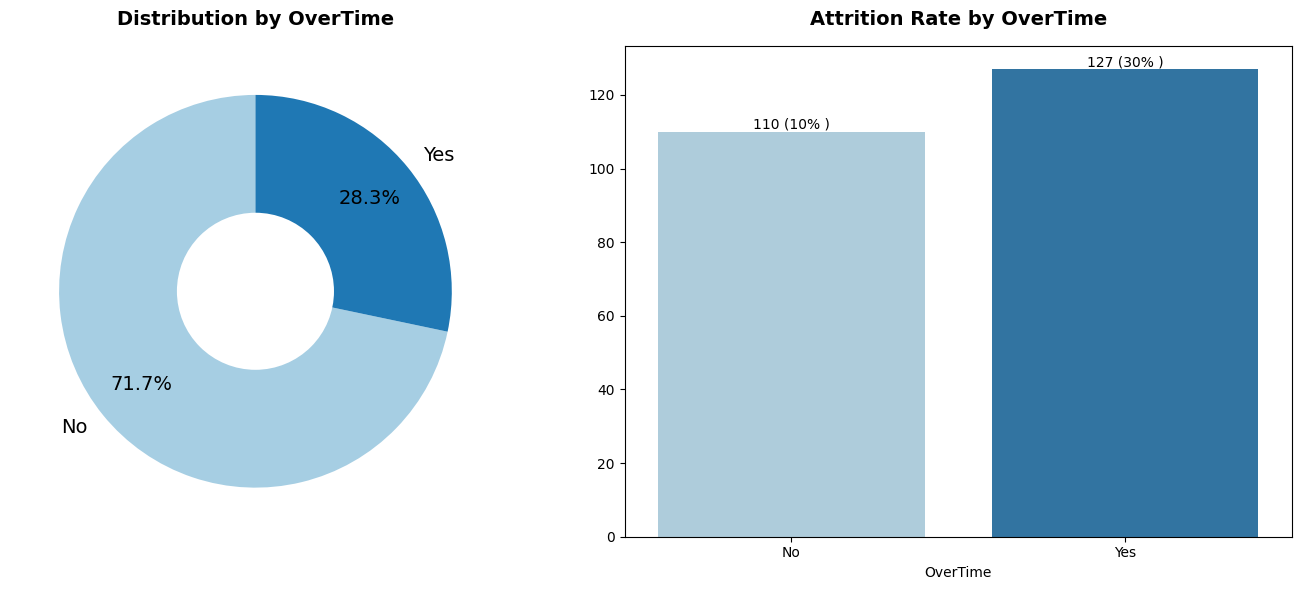

In [26]:
pie_bar_plot(data, 'OverTime', 'Attrition')


Most of employees don't do overtime
There is high attrition among those who overtime i.e work for more hours than regular working hours.

# **Attrition by Daily rate**

<ipython-input-22-cc96671636ff>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=hue, y=col, data=data, palette='hls')


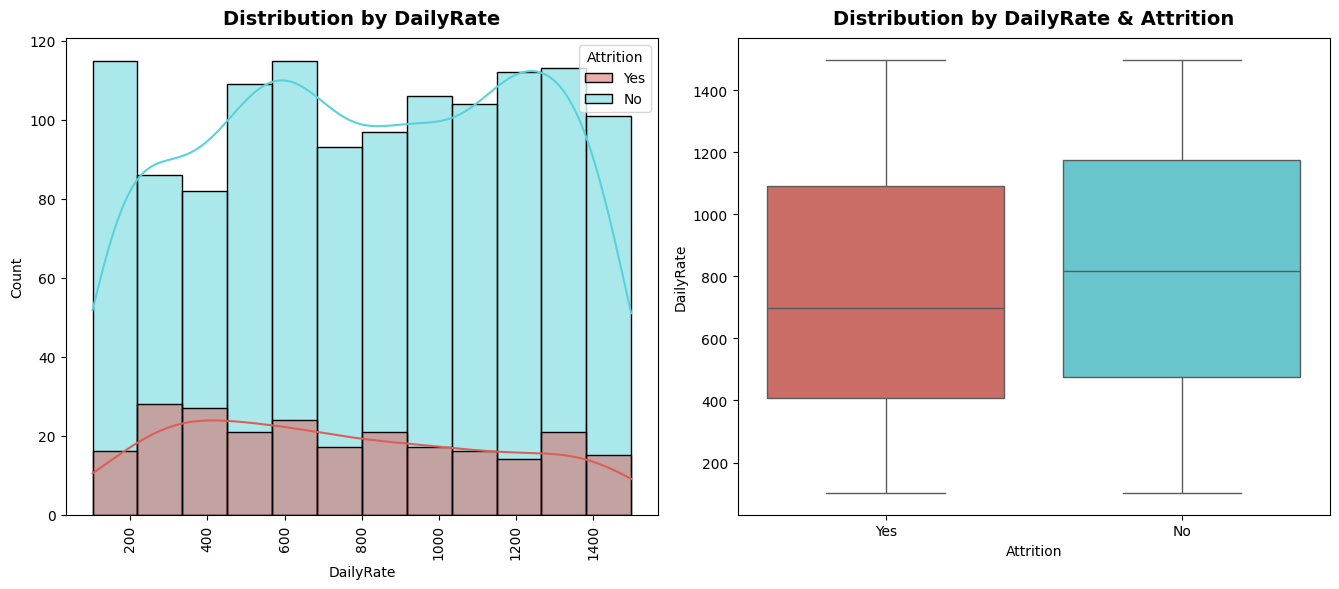

In [27]:
hist_with_hue(data, 'DailyRate', 'Attrition')


In [28]:
def count_percent_plot(df, col, hue):
     plt.figure(figsize=(13.5, 8))
     plt.subplot(1, 2, 1)
     value_1 = df[col].value_counts()
     sns.barplot(x=value_1.index, y=value_1.values, order=value_1.index, palette='husl')
     plt.title(f"Employees by {col}", fontweight="black", size=14, pad=15)
     for index, value in enumerate(value_1.values):
        count_percentage = "{:.1f}%".format((value / len(df)) * 100)
        plt.text(index, value, f"{value} ({count_percentage})", ha="center", va="bottom", size=10)
     plt.xticks(rotation=90)

    # Sort the values for the second subplot to match the order of the first subplot
     value_2 = df[df[hue] == 'Yes'][col].value_counts().reindex(value_1.index)

     plt.subplot(1, 2, 2)
     attrition_rate = (value_2 / value_1 * 100).values
     sns.barplot(x=value_2.index, y=value_2.values, order=value_1.index, palette='husl')
     plt.title(f"Employee Attrition by {col}", fontweight="black", size=14, pad=15)
     for index, value in enumerate(value_2.values):
        attrition_percentage = "{:.1f}%".format(np.round(attrition_rate[index], 1))
        plt.text(index, value, f"{value} ({attrition_percentage})", ha="center", va="bottom", size=10)
     plt.xticks(rotation=90)
     plt.tight_layout()
     plt.show()

# **Attrition by Education Field**

<ipython-input-28-4e84c9b00c21>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_1.index, y=value_1.values, order=value_1.index, palette='husl')
<ipython-input-28-4e84c9b00c21>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_2.index, y=value_2.values, order=value_1.index, palette='husl')


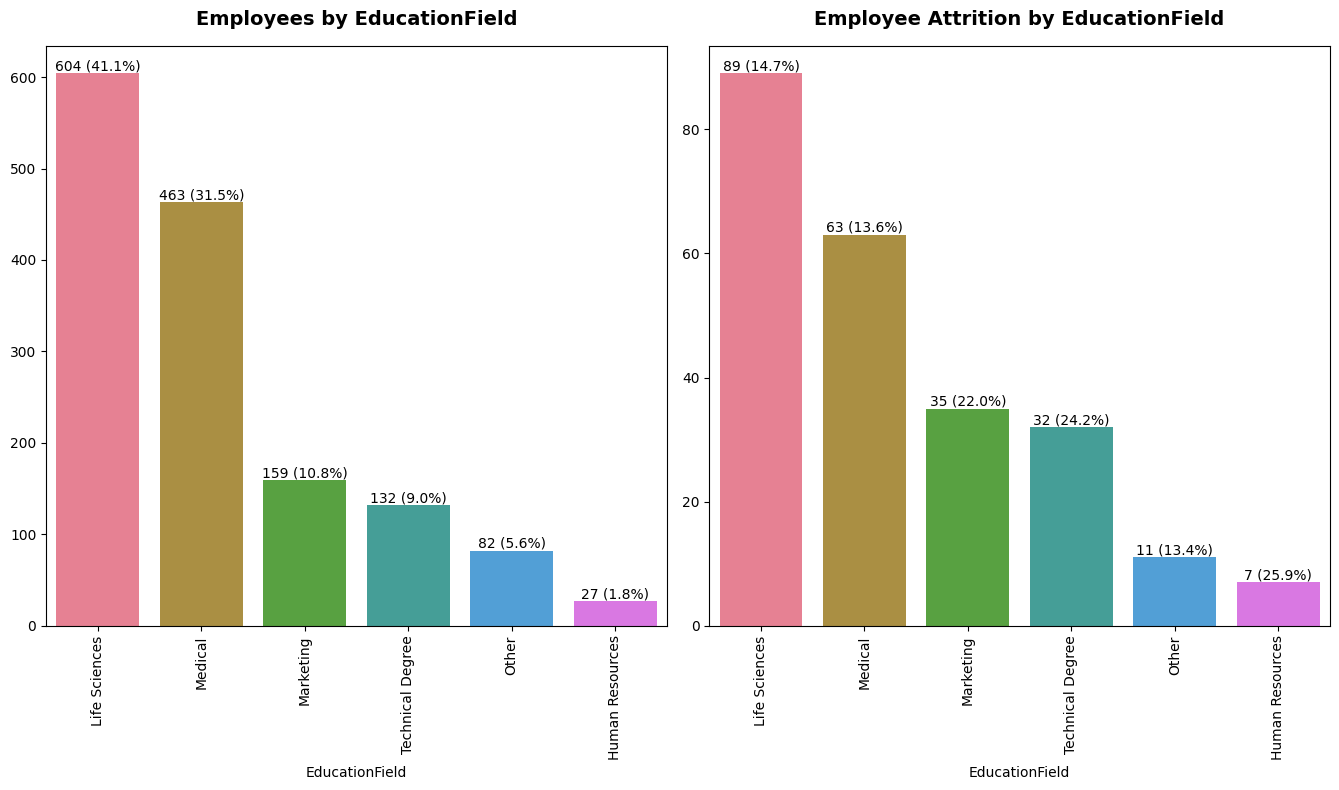

In [29]:
count_percent_plot(data, 'EducationField', 'Attrition')


Most of the employees are either from Life Science or Medical Education Field.
Very few employees are from Human Resources Education Field.
Education Fields like Human Resources, Technical, Marketing is having very high attrition rate.
This may be because of work load becuase there are very few employees in these education fields compared to education field with less attrition rate.

# **Attrition by Job Role**

<ipython-input-28-4e84c9b00c21>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_1.index, y=value_1.values, order=value_1.index, palette='husl')
<ipython-input-28-4e84c9b00c21>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_2.index, y=value_2.values, order=value_1.index, palette='husl')


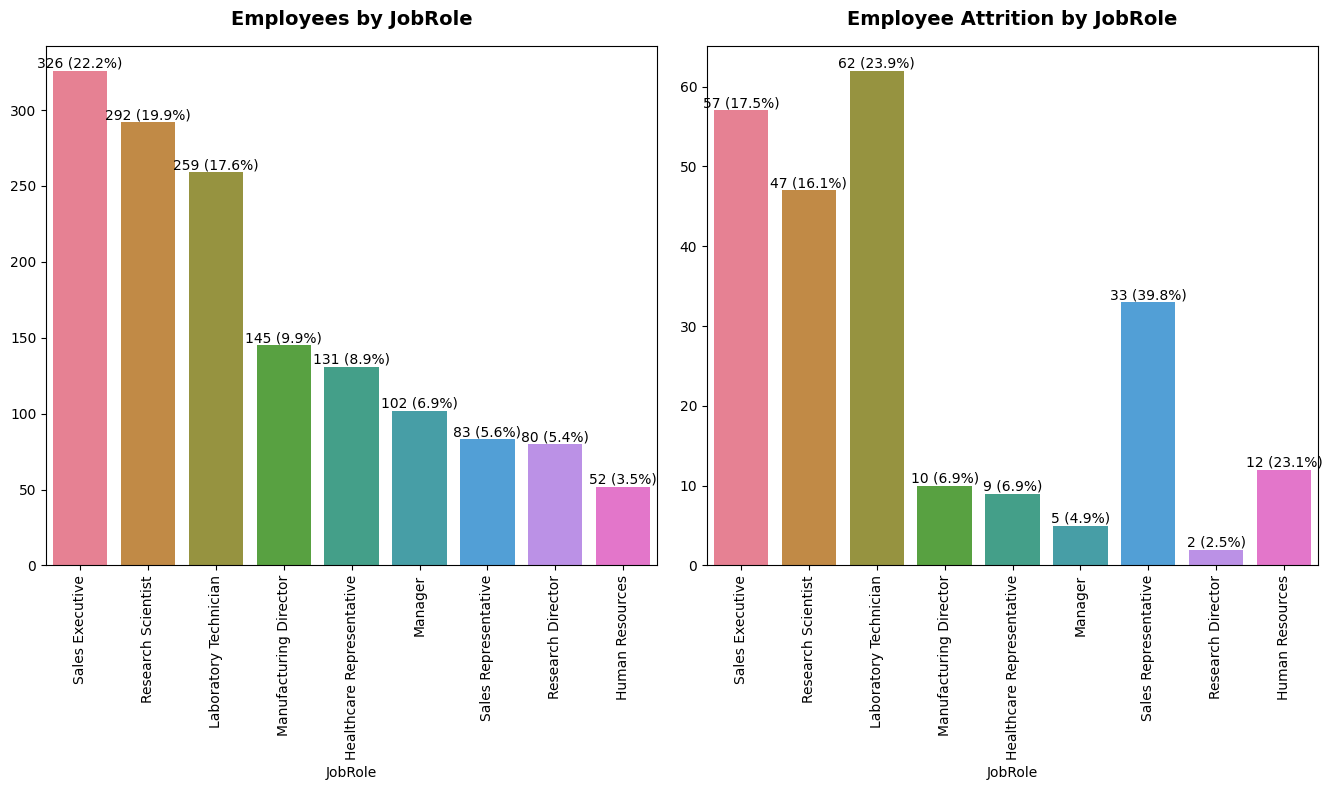

In [30]:
count_percent_plot(data, 'JobRole', 'Attrition')


Most employees is working as Sales executive, Research Scientist or Laboratory Technician.
Highest attrition rates are in role of Sale Representative.

# **Attrition by Job Level**

<ipython-input-28-4e84c9b00c21>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_1.index, y=value_1.values, order=value_1.index, palette='husl')
<ipython-input-28-4e84c9b00c21>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_2.index, y=value_2.values, order=value_1.index, palette='husl')


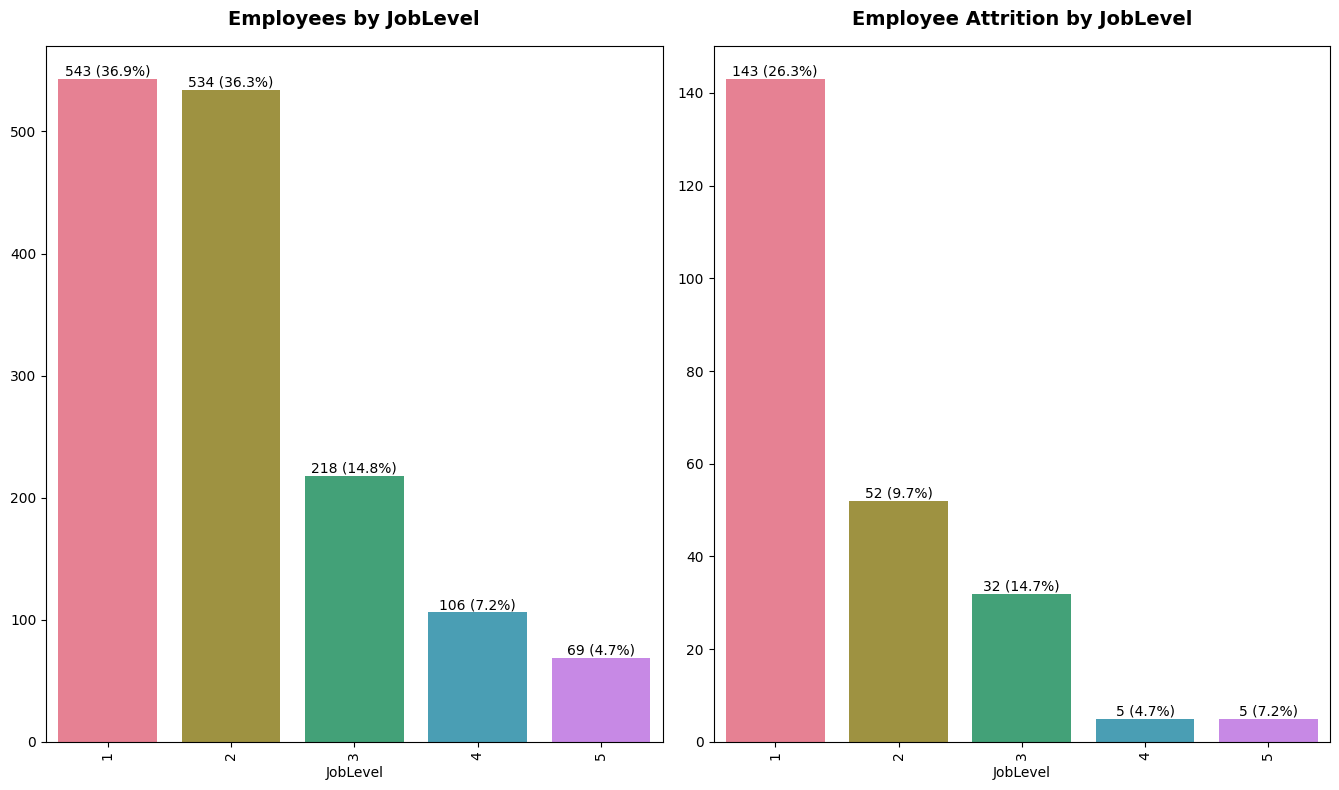

In [31]:
count_percent_plot(data, 'JobLevel', 'Attrition')


Most of the employees in the organization are at Entry Level or Junior Level.
Highest Attrition is at the Entry Level

# **Attrition by Monthly Income**

<ipython-input-22-cc96671636ff>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=hue, y=col, data=data, palette='hls')


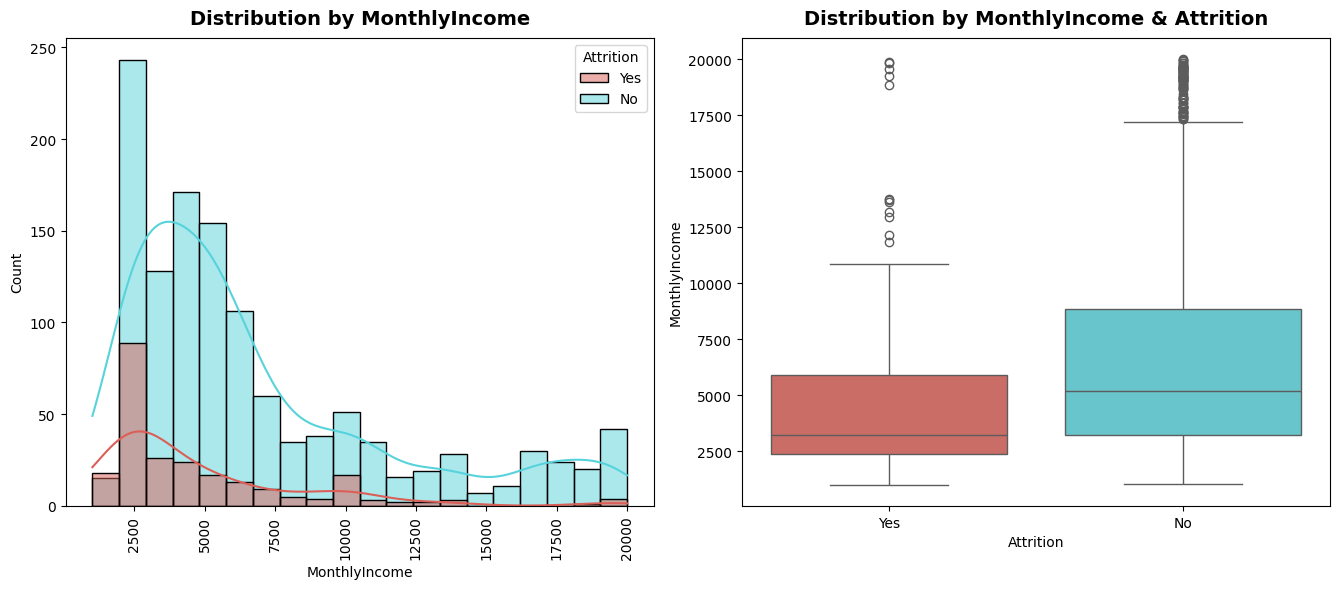

In [32]:
hist_with_hue(data, 'MonthlyIncome', 'Attrition')


Most of the employees are getting paid less than 10000 in the organiation.
As the Monthly Income increases the attrition decreases.

# **Employee Attrition by monthly rate**

<ipython-input-22-cc96671636ff>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=hue, y=col, data=data, palette='hls')


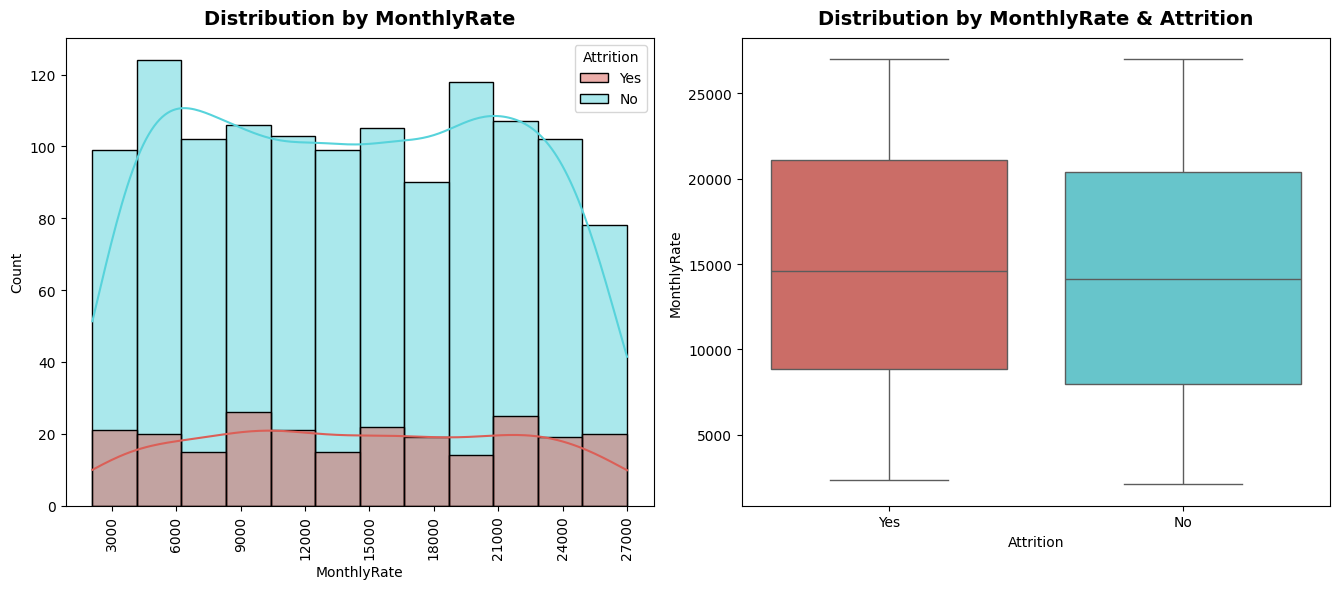

In [33]:
hist_with_hue(data, 'MonthlyRate', 'Attrition')


The distribution of MonthlyRate is similar througout the column.
This feature doen't give much insights.

# **Attrition by distance from home**

In [34]:
print("Total Unique Values in 'DistanceFromHome'  is =>",data["DistanceFromHome"].nunique())


Total Unique Values in 'DistanceFromHome'  is => 29


In [35]:
data["DistanceFromHome"].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
DistanceFromHome,1466.0,9.200546,8.110796,1.0,2.0,7.0,14.0,29.0


In [36]:
# Define the bin edges for the groups
bin_edges = [0,5,10,15,20,30]

# Define the labels for the groups
bin_labels = ['0-5 kms', '6-10 kms', '11-15 kms','16-20 kms', '20+ kms']

# Cuttinf the DistaanceFromHome column into groups
data['DistanceGroup'] = pd.cut(data['DistanceFromHome'], bins=bin_edges, labels=bin_labels)


<ipython-input-28-4e84c9b00c21>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_1.index, y=value_1.values, order=value_1.index, palette='husl')
<ipython-input-28-4e84c9b00c21>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_2.index, y=value_2.values, order=value_1.index, palette='husl')


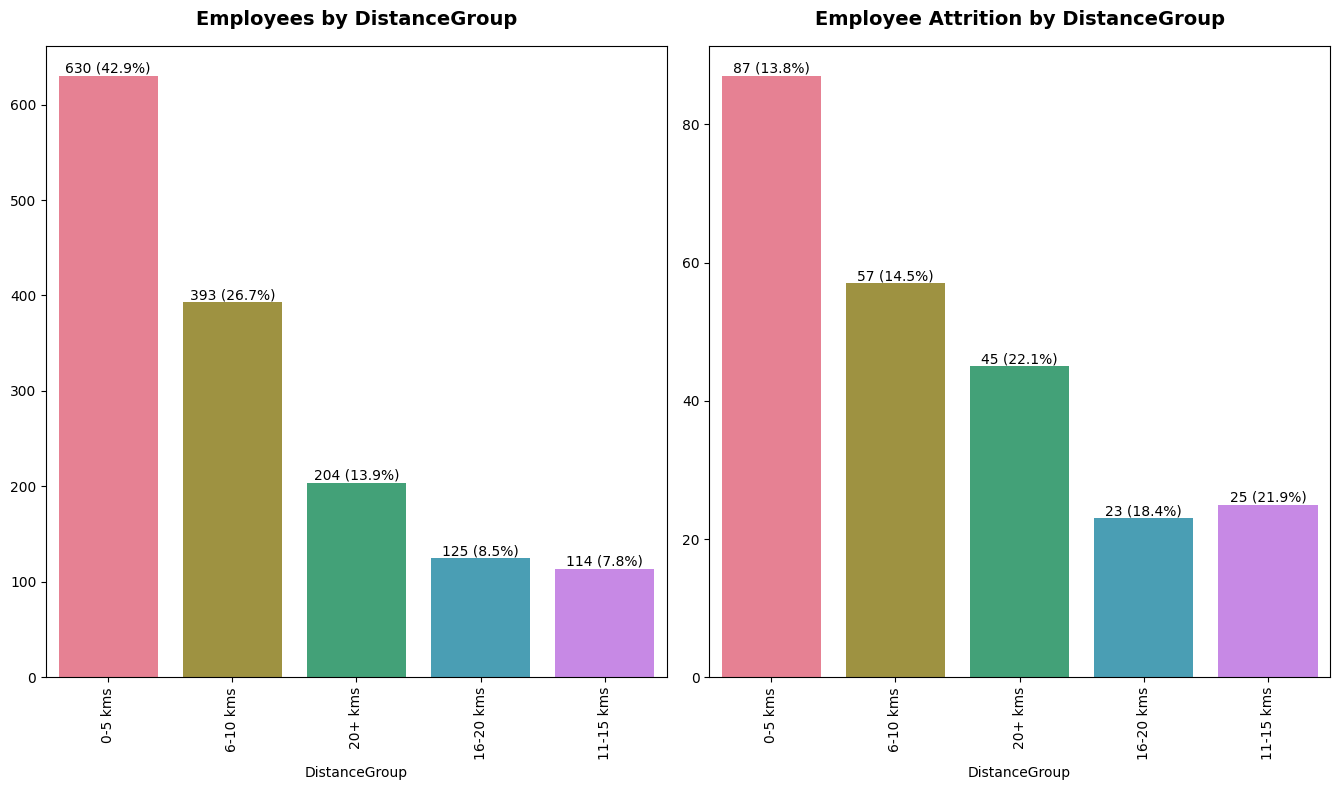

In [37]:
count_percent_plot(data, 'DistanceGroup', 'Attrition')


Most of the employees are living within 10kms radius from the organisation.

As the distance from the organisation increases, Attrition Rate also increases.

# **Attrition by Number of Companies Worked**

In [38]:
print("Total Unique Values in 'NumCompaniesWorked' is =>",data["NumCompaniesWorked"].nunique())


Total Unique Values in 'NumCompaniesWorked' is => 10


In [39]:
data["NumCompaniesWorked"].describe().to_frame().T


,count,mean,std,min,25%,50%,75%,max
NumCompaniesWorked,1470.0,2.693197,2.498009,0.0,1.0,2.0,4.0,9.0


In [40]:
# Define the bin edges for the groups
bin_edges = [-1, 1, 3, 5, 10]     # starting from -1 since we have '0' in the data

# Define the labels for the groups
bin_labels = ['0-1 Companies', '2-3 companies', '4-5 companies', "6-9 companies"]

# Cut the DailyRate column into groups
data["NumCompaniesWorkedGroup"] = pd.cut(data['NumCompaniesWorked'], bins=bin_edges, labels=bin_labels)

<ipython-input-28-4e84c9b00c21>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_1.index, y=value_1.values, order=value_1.index, palette='husl')
<ipython-input-28-4e84c9b00c21>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_2.index, y=value_2.values, order=value_1.index, palette='husl')


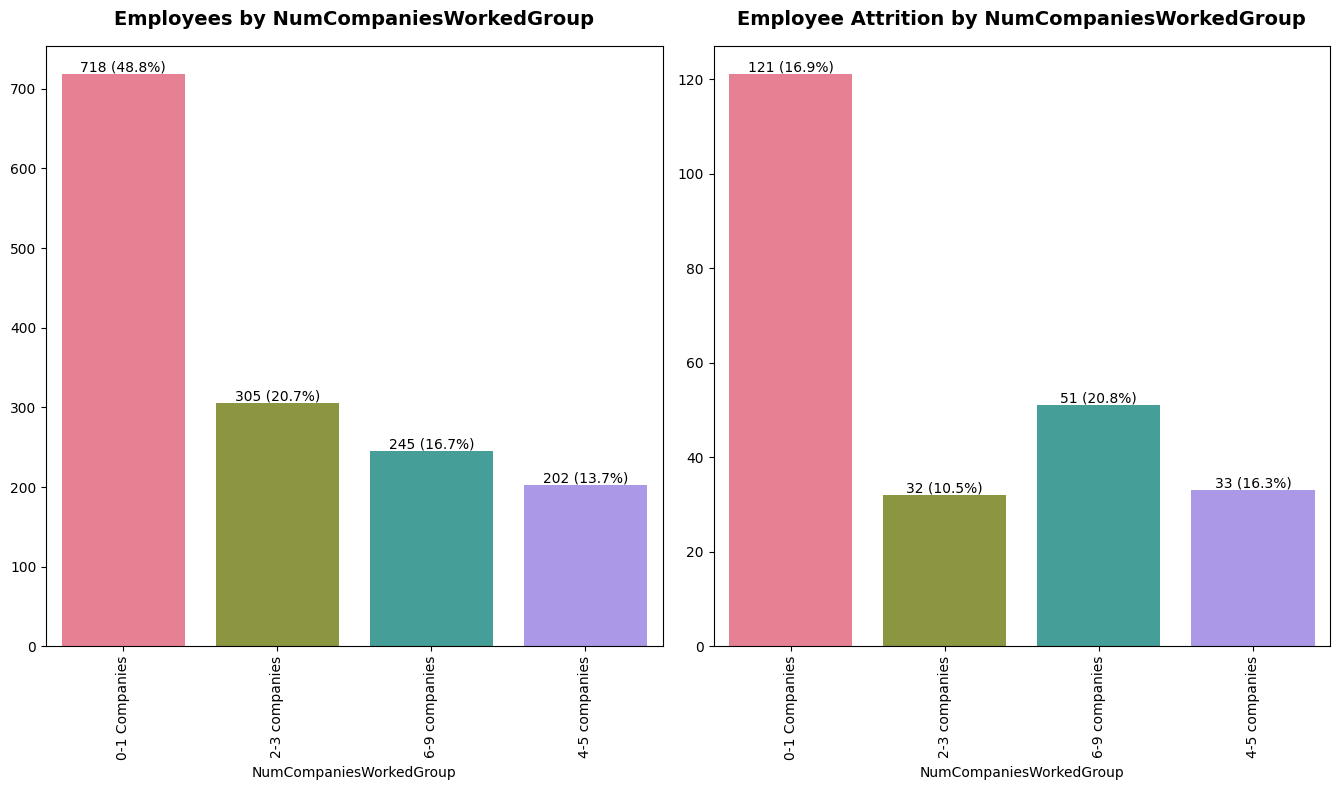

In [41]:
count_percent_plot(data, 'NumCompaniesWorkedGroup', 'Attrition')


Most of the employees have worked for less than 2 companies.

There's a high attrition rate of employees who have worked for more than 5 companies followed by the employee who have worked for less than two companies


# **Attrition by Percentage Salary Hike**

<ipython-input-22-cc96671636ff>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=hue, y=col, data=data, palette='hls')


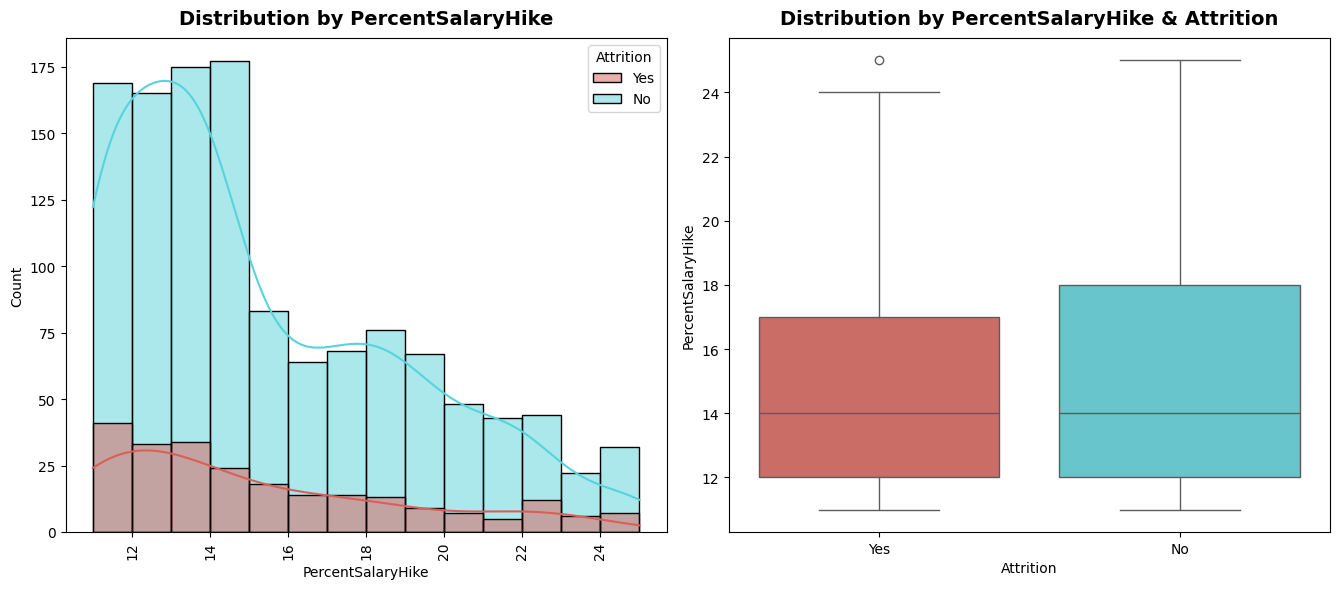

In [42]:
hist_with_hue(data, 'PercentSalaryHike', 'Attrition')

Very Few employees are getting a high percent salary hike.
As the amount of percent salary increases the attrition rate decreases

# **Attrition by Total Working Years**

In [43]:
print("Total Unique Values in 'TotalWorkingYears' is =>",data["TotalWorkingYears"].nunique())


Total Unique Values in 'TotalWorkingYears' is => 40


In [44]:
data["TotalWorkingYears"].describe().to_frame().T


,count,mean,std,min,25%,50%,75%,max
TotalWorkingYears,1470.0,11.279592,7.780782,0.0,6.0,10.0,15.0,40.0


In [45]:
# Define the bin edges for the groups
bin_edges = [-1, 3, 5, 10, 20, 50]     # starting from -1 since we have '0' in the data

# Define the labels for the groups
bin_labels = ['0-3 years', '4-5 years', '6-10 years', '11-20 years', "20+ years"]

# Cut the DailyRate column into groups
data["TotalWorkingYearsGroup"] = pd.cut(data['TotalWorkingYears'], bins=bin_edges, labels=bin_labels)

<ipython-input-28-4e84c9b00c21>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_1.index, y=value_1.values, order=value_1.index, palette='husl')
<ipython-input-28-4e84c9b00c21>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_2.index, y=value_2.values, order=value_1.index, palette='husl')


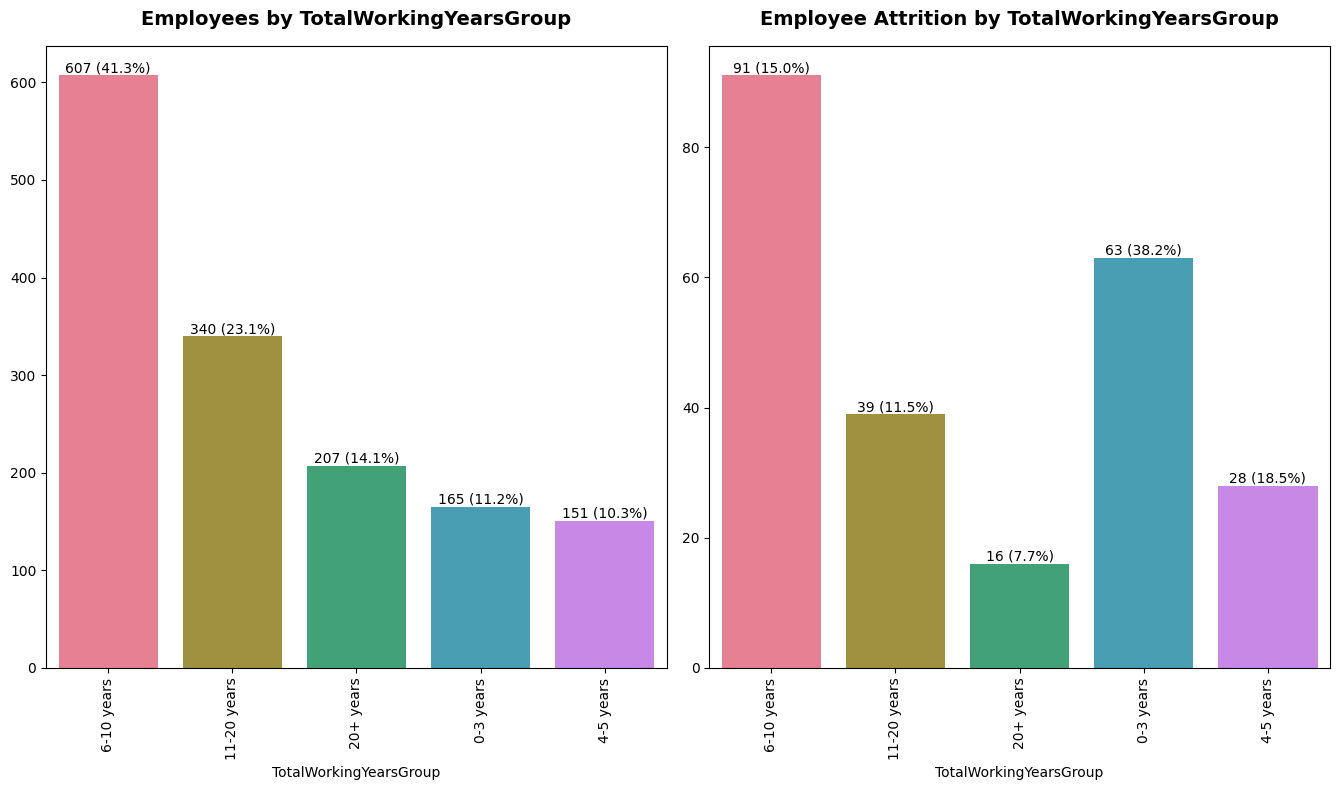

In [46]:
count_percent_plot(data, 'TotalWorkingYearsGroup', 'Attrition')


Most of the employees are having a total of 6 to 10 years of working experience.
Employee with working experience upto 3 years are having High Attrition Rate.
Employee with working experience of above 10 years are having Less Attrition Rate.

# **Attrition by Years at Company**

<ipython-input-22-cc96671636ff>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=hue, y=col, data=data, palette='hls')


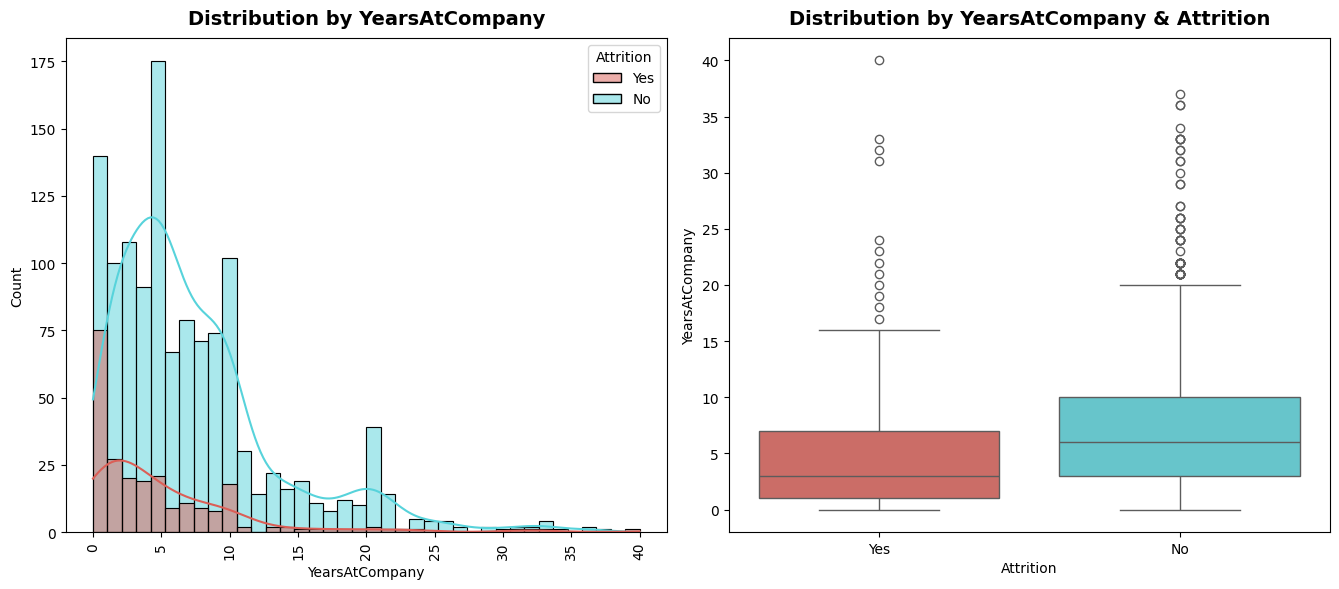

In [47]:
hist_with_hue(data, 'YearsAtCompany', 'Attrition')


Employee who have worked for 10+ years are having low attrition rate.

Highest Attrition is in the first year of employee joining organisation.

# **Attrition by Years In Current Role**

<ipython-input-22-cc96671636ff>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=hue, y=col, data=data, palette='hls')


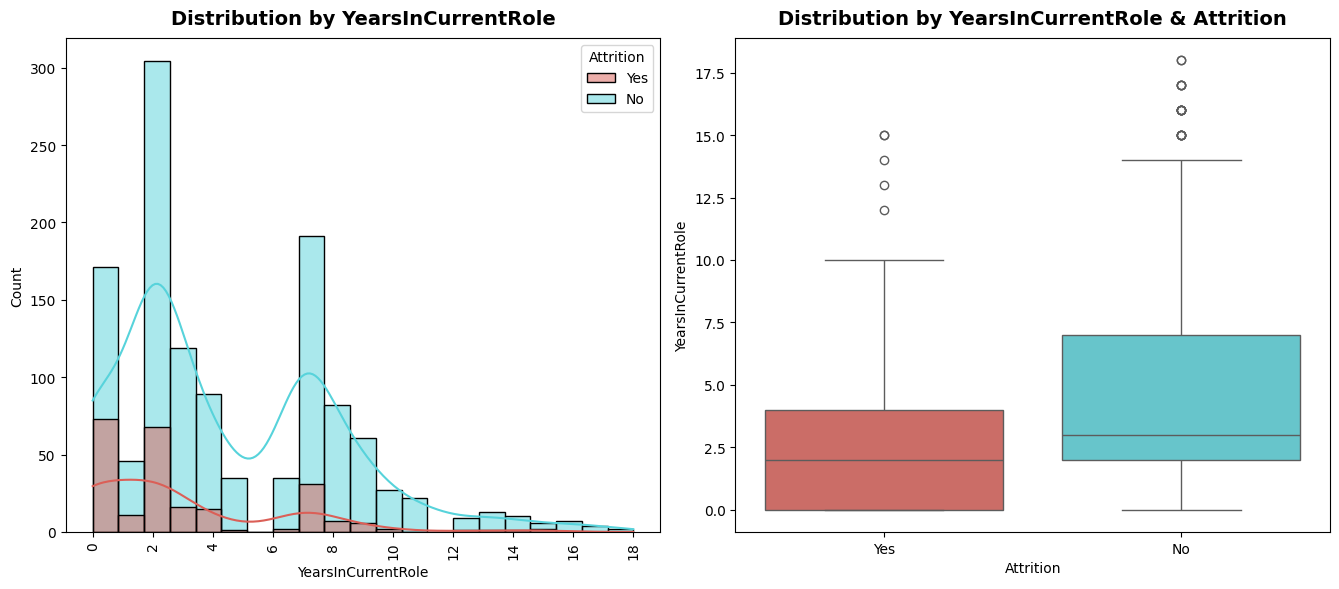

In [48]:
hist_with_hue(data, 'YearsInCurrentRole', 'Attrition')


Employee who have worked for 8+ years in Current Role are less likely to leave organisation.

Highest Attrition is in the first two year of the Current Role.

# **Attrition by Years Since Last Promotion**

<ipython-input-22-cc96671636ff>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=hue, y=col, data=data, palette='hls')


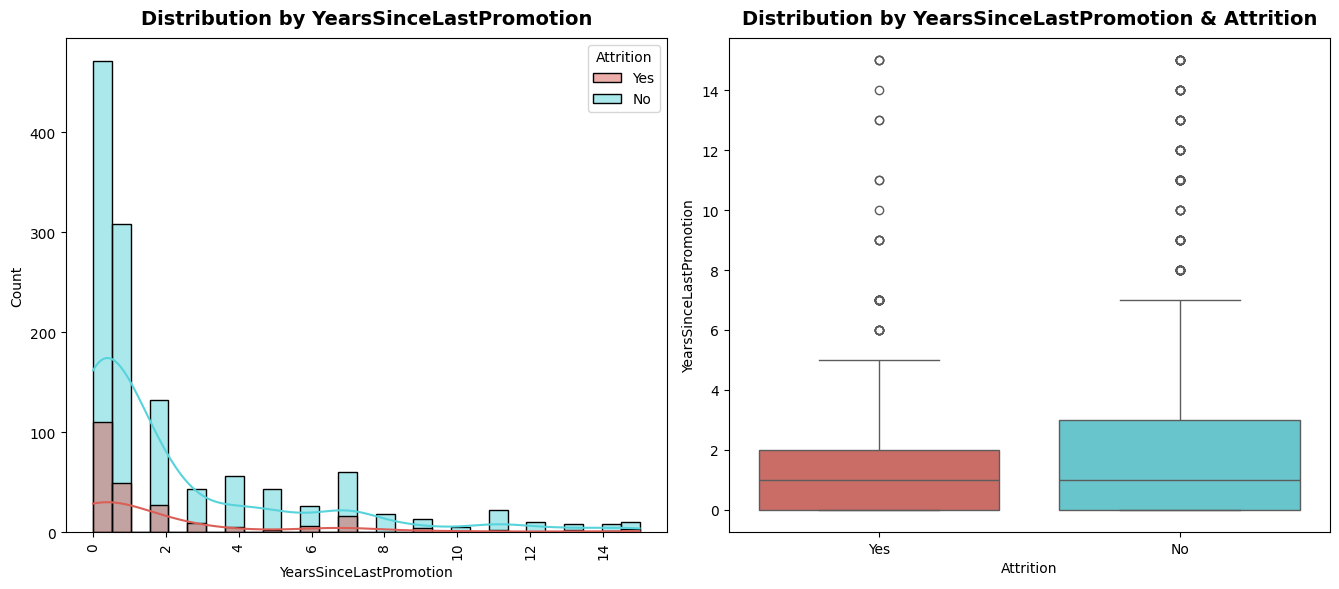

In [49]:
hist_with_hue(data, 'YearsSinceLastPromotion', 'Attrition')


# **Attrition by Years with Current Manager**

<ipython-input-22-cc96671636ff>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=hue, y=col, data=data, palette='hls')


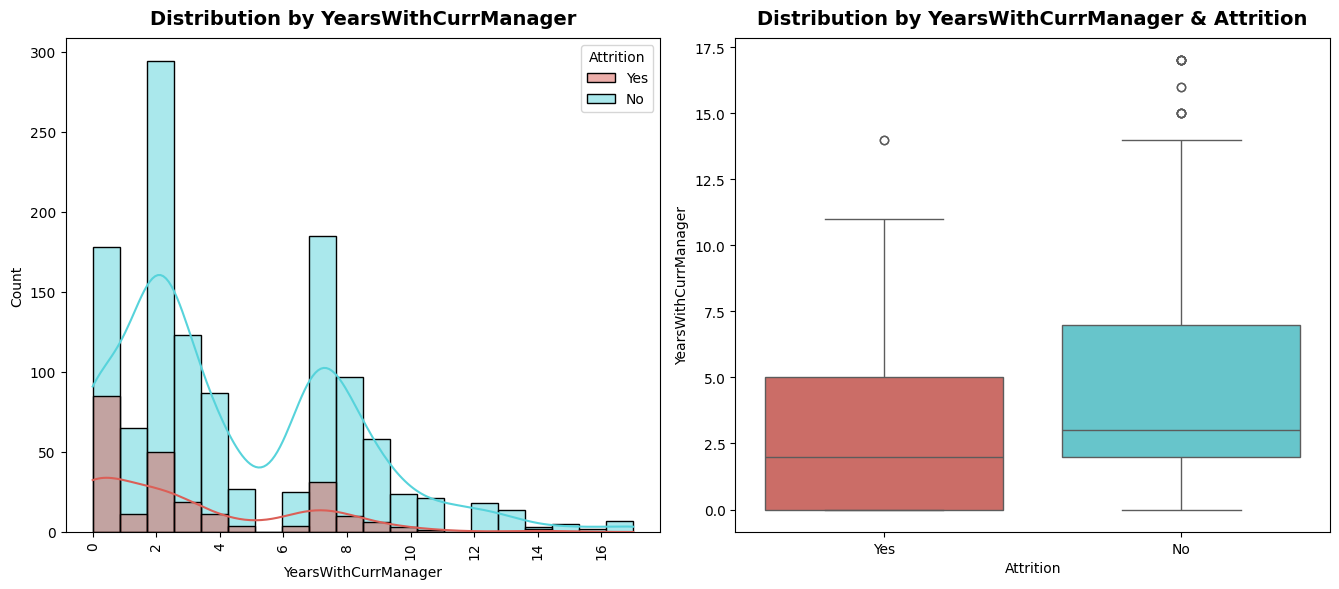

In [50]:
hist_with_hue(data, 'YearsWithCurrManager', 'Attrition')
